In [1]:
using Pkg,Plots
Pkg.activate("..")
using OpenSAFT

Activating environment at `~/Documents/University/UROP/SAFT codes/OpenSAFT/Project.toml`


In this notebook we will try to replicate various figures from V. Papaioannou _et al._ 's 2016 paper

## Figure 2

In [2]:
# Setting up the models
methane      = system(["methane"],"SAFTVRMie")
CO2          = system(["carbon dioxide"],"SAFTVRMie");

In [3]:
# Get critical point for all species
(T_c_methane, p_c_methane, v_c_methane)  = get_crit_pure(methane)
(T_c_CO2, p_c_CO2, v_c_CO2)              = get_crit_pure(CO2);

In [4]:
# Get saturation properties for all species
T_methane = range(100, T_c_methane, length = 100)
T_CO2     = range(200, T_c_CO2, length = 100)

(P_sat_methane, v_l_methane, v_v_methane) = get_sat_pure(methane,T_methane)
(P_sat_CO2, v_l_CO2, v_v_CO2)             = get_sat_pure(CO2,T_CO2);

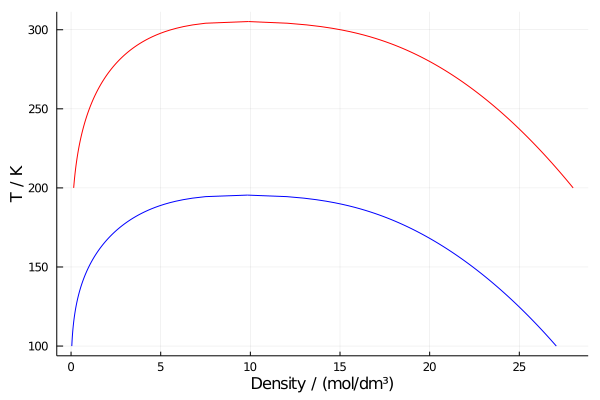

In [5]:
plt = plot(1e-3 ./v_l_methane, T_methane,color=:blue,xlabel="Density / (mol/dm³)",ylabel="T / K", label = "")
plt = plot!(1e-3 ./v_v_methane, T_methane,color=:blue, label = "")
plt = plot!(1e-3 ./v_l_CO2, T_CO2,color=:red, label = "")
plt = plot!(1e-3 ./v_v_CO2, T_CO2,color=:red, label = "")
display(plt)

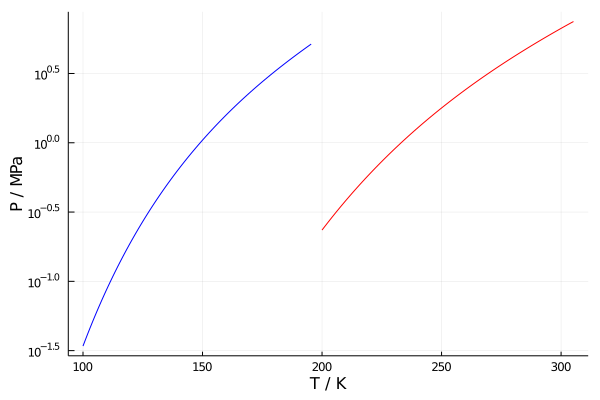

In [6]:
plt = plot(T_methane, P_sat_methane/1e6,color=:blue,yaxis=:log,xlabel="T / K",ylabel="P / MPa", label = "")
plt = plot!(T_CO2, P_sat_CO2/1e6,color=:red,yaxis=:log,xlabel="T / K",ylabel="P / MPa", label = "")
display(plt)

## Figure 3

In [7]:
# Setting up the models
CO2      = system(["carbon dioxide"],"SAFTVRMie");

In [8]:
# Get various isotherms
T = range(200,800,length=100)
z = create_z(CO2,[1.0])
v_1 = []
v_2 = []
v_3 = []
v_4 = []
v_5 = []
for i in T
    append!(v_1,get_volume(CO2,z,10*1e6,i,"liquid"))
    append!(v_2,get_volume(CO2,z,20*1e6,i,"liquid"))
    append!(v_3,get_volume(CO2,z,30*1e6,i,"liquid"))
    append!(v_4,get_volume(CO2,z,40*1e6,i,"liquid"))
    append!(v_5,get_volume(CO2,z,50*1e6,i,"liquid"))
end

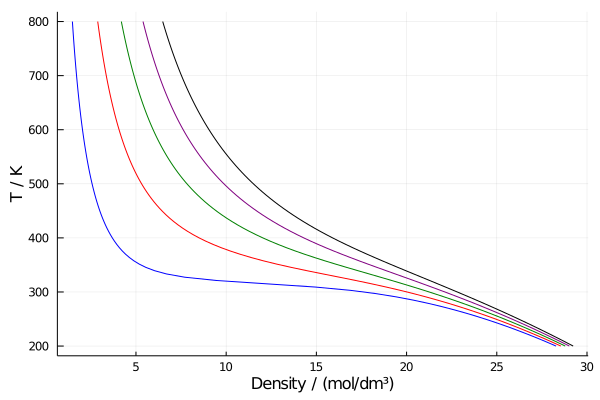

In [9]:
plt = plot(1e-3 ./v_1, T,color=:blue,xlabel="Density / (mol/dm³)",ylabel="T / K", label = "")
plt = plot!(1e-3 ./v_2, T,color=:red, label = "")
plt = plot!(1e-3 ./v_3, T,color=:green, label = "")
plt = plot!(1e-3 ./v_4, T,color=:purple, label = "")
plt = plot!(1e-3 ./v_5, T,color=:black, label = "")
display(plt)

## Figure 4

In [10]:
# Setting up the models
water    = system(["water"],"SAFTVRMie")
methanol = system(["methanol"],"SAFTVRMie");

In [11]:
# Get critical point for all species
(T_c_methanol, p_c_methanol, v_c_methanol)  = get_crit_pure(methanol)
(T_c_water, p_c_water, v_c_water)           = get_crit_pure(water);

In [12]:
# Get saturation properties for all species
T_methanol = range(270, T_c_methanol, length = 150)
T_water     = range(320, T_c_water, length = 100)

(P_sat_methanol, v_l_methanol, v_v_methanol) = get_sat_pure(methanol,T_methanol)
(P_sat_water, v_l_water, v_v_water)             = get_sat_pure(water,T_water);

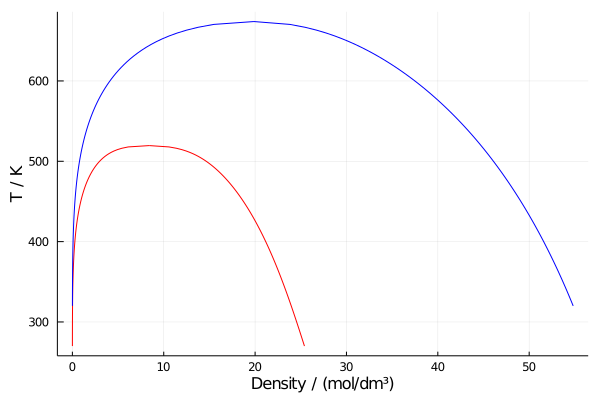

In [13]:
plt = plot(1e-3 ./v_l_methanol, T_methanol,color=:red,xlabel="Density / (mol/dm³)",ylabel="T / K", label = "")
plt = plot!(1e-3 ./v_v_methanol, T_methanol,color=:red, label = "")
plt = plot!(1e-3 ./v_l_water, T_water,color=:blue, label = "")
plt = plot!(1e-3 ./v_v_water, T_water,color=:blue, label = "")
display(plt)

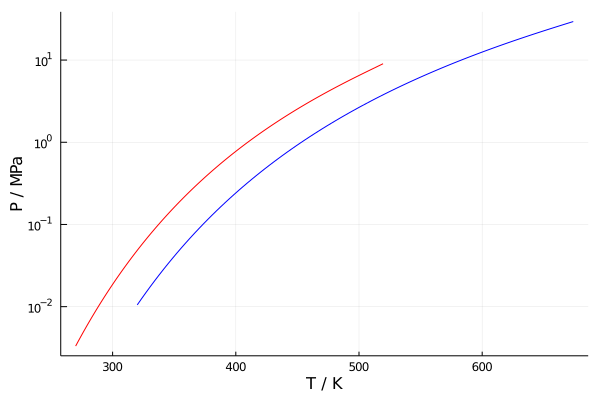

In [14]:
plt = plot(T_methanol, P_sat_methanol/1e6,color=:red,yaxis=:log,xlabel="T / K",ylabel="P / MPa", label = "")
plt = plot!(T_water, P_sat_water/1e6,color=:blue,yaxis=:log,xlabel="T / K",ylabel="P / MPa", label = "")
display(plt)